In [132]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
RSEED = 42
C = 3

In [135]:
X, y = make_blobs(n_samples=500, n_features=10, centers=C, cluster_std=2, center_box=(-10.0, 10.0), random_state=RSEED)

In [136]:
X[:1]

array([[  1.61380953,  11.43101859,   6.68800389,   3.15822358,
         -5.32290504,  -7.98248103, -10.47472552,   7.316774  ,
          1.68193099,   3.25499546]])

In [137]:
y[:1]

array([0])

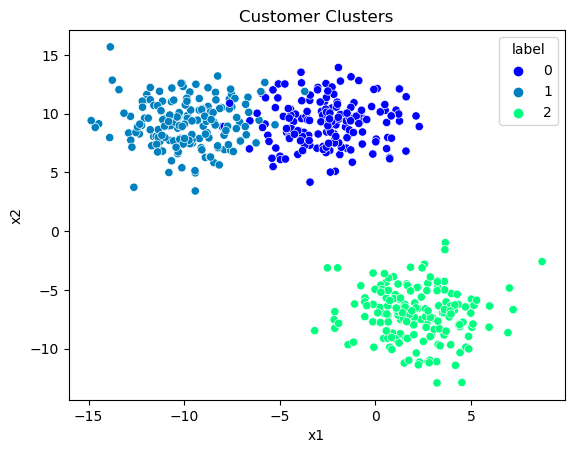

In [138]:
# Create a DataFrame for plotting
df_blobs = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df_blobs['label'] = y

# Plot using seaborn
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='label', palette='winter')
plt.title('Customer Clusters')
plt.show()

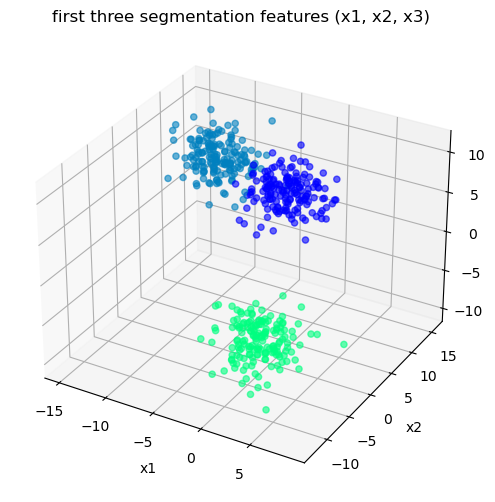

In [139]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_blobs['x1'], df_blobs['x2'], df_blobs['x3'], c=df_blobs['label'], cmap='winter', alpha=0.6)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('first three segmentation features (x1, x2, x3)')
# plt.legend(*scatter.legend_elements(), title="Label")
plt.show()

In [140]:
df_blobs.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,1.613810,11.431019,6.688004,3.158224,-5.322905,-7.982481,-10.474726,7.316774,1.681931,3.254995,0
1,-11.949936,11.626840,8.079615,-4.316846,-5.486549,-6.292676,-2.569433,1.678757,-2.069181,-5.322621,1
2,-7.504861,10.565286,6.389818,-4.593503,-7.777286,-4.620798,-0.616193,2.636350,-2.820305,-3.452583,1
3,-1.997138,10.979668,7.970828,4.001910,-10.561376,-9.439264,-10.087965,7.375705,3.057618,2.709964,0
4,-7.891962,6.933150,7.753453,-4.501956,-7.757044,-5.167857,-3.394271,-0.582555,-3.378209,-8.100669,1


In [ ]:
df_blobs.to_csv('../data/customer_clusters.csv', index=False)

In [ ]:
df = pd.read_csv('../data/customer_clusters.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,label
0,1.613810,11.431019,6.688004,3.158224,-5.322905,-7.982481,-10.474726,7.316774,1.681931,3.254995,0
1,-11.949936,11.626840,8.079615,-4.316846,-5.486549,-6.292676,-2.569433,1.678757,-2.069181,-5.322621,1
2,-7.504861,10.565286,6.389818,-4.593503,-7.777286,-4.620798,-0.616193,2.636350,-2.820305,-3.452583,1
3,-1.997138,10.979668,7.970828,4.001910,-10.561376,-9.439264,-10.087965,7.375705,3.057618,2.709964,0
4,-7.891962,6.933150,7.753453,-4.501956,-7.757044,-5.167857,-3.394271,-0.582555,-3.378209,-8.100669,1


In [143]:
df_features = df.drop(columns='label')

In [ ]:
df_features.to_parquet('../data/customer_features.parquet', index=False)

In [144]:
df_features.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.613810,11.431019,6.688004,3.158224,-5.322905,-7.982481,-10.474726,7.316774,1.681931,3.254995
1,-11.949936,11.626840,8.079615,-4.316846,-5.486549,-6.292676,-2.569433,1.678757,-2.069181,-5.322621
2,-7.504861,10.565286,6.389818,-4.593503,-7.777286,-4.620798,-0.616193,2.636350,-2.820305,-3.452583
3,-1.997138,10.979668,7.970828,4.001910,-10.561376,-9.439264,-10.087965,7.375705,3.057618,2.709964
4,-7.891962,6.933150,7.753453,-4.501956,-7.757044,-5.167857,-3.394271,-0.582555,-3.378209,-8.100669


In [145]:
model = KMeans(n_clusters=C, random_state=RSEED)

In [146]:
model.fit(df_features)

/Users/matthiasmotl/opt/anaconda3/envs/zoomcamp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [147]:
model.labels_

array([2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2,

In [149]:
model.labels_

array([2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2,

In [152]:
df_features['new_label'] = model.labels_

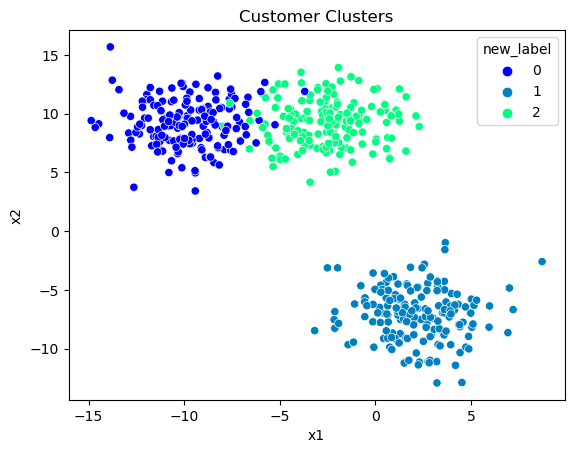

In [153]:
# Create a DataFrame for plotting
df_blobs = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df_blobs['label'] = y

# Plot using seaborn
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue=df_features['new_label'], palette='winter')
plt.title('Customer Clusters')
plt.show()